## Loading the Data

In [10]:
df = read.csv('./data/alcoholtobacco.csv', sep='\t', fileEncoding = "UTF-16LE")
head(df)

Region,Alcohol,Tobacco
North,6.47,4.03
Yorkshire,6.13,3.76
Northeast,6.19,3.77
EastMidlands,4.89,3.34
WestMidlands,5.63,3.47
EastAnglia,4.52,2.92


## Fitting Model

In [154]:
model = lm(Alcohol~Tobacco, data=df)
model.smr = summary(model)
model.smr


Call:
lm(formula = Alcohol ~ Tobacco, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7080 -0.4245  0.2311  0.6081  0.9020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   4.3512     1.6067   2.708   0.0241 *
Tobacco       0.3019     0.4388   0.688   0.5087  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8196 on 9 degrees of freedom
Multiple R-squared:  0.04998,	Adjusted R-squared:  -0.05557 
F-statistic: 0.4735 on 1 and 9 DF,  p-value: 0.5087


## Standardizing Residuals

In [152]:
fits = model.smr$coefficients[1] + model.smr$coefficients[2] * df$Tobacco
res = model.smr$residuals # equivalantly = df$Alcohol -  fits
cat('sd(res):', sd(res), '\nResidual standard error: 0.8196')
res.std = res / sd(res)

t(round(data.frame(alcohol=df$Alcohol, fit=fits, res=res, standard.res=res.std), digits=3))

sd(res): 0.7775693 
Residual standard error: 0.8196

,1,2,3,4,5,6,7,8,9,10,11
alcohol,6.470,6.130,6.190,4.890,5.630,4.520,5.890,4.790,5.270,6.080,4.020
fit,5.568,5.486,5.489,5.360,5.399,5.233,5.317,5.169,5.417,5.713,5.728
res,0.902,0.644,0.701,-0.470,0.231,-0.713,0.573,-0.379,-0.147,0.367,-1.708
standard.res,1.160,0.828,0.901,-0.604,0.297,-0.917,0.736,-0.488,-0.189,0.472,-2.197


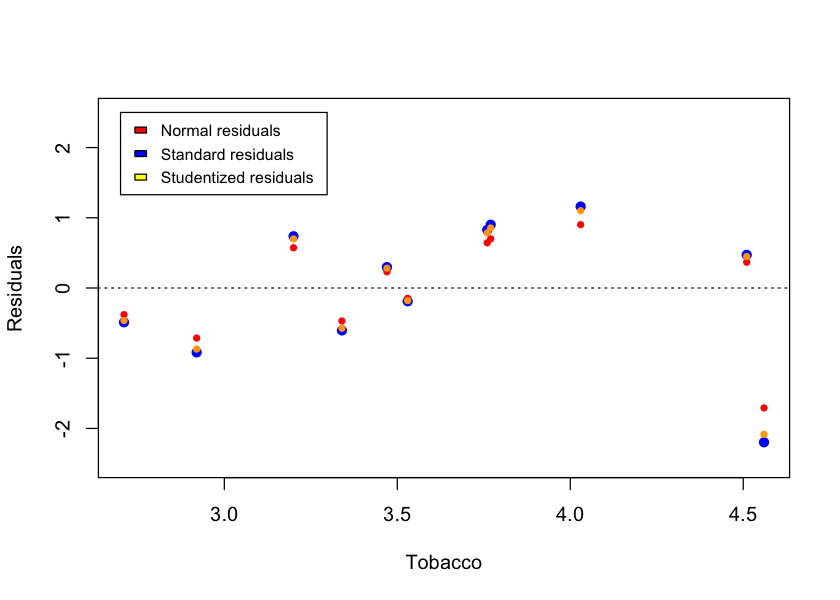

In [153]:
if (!exists('opts')) opts = options()
options(repr.plot.height=5)

plot(df$Tobacco, res.std, ylim=c(-2.5, 2.5), pch=19, cex=1, col='blue', xlab='Tobacco', ylab='Residuals')
points(df$Tobacco, res, pch=20, col='red')
points(df$Tobacco, res / 0.8196, col='orange', pch=20)
abline(h=0, lty=3)

legend(2.7, 2.5, legend=c('Normal residuals', 'Standard residuals', 'Studentized residuals'),
       fill=c('red', 'blue', 'yellow'), cex=0.8, y.intersp=2)